In [82]:
%load_ext autoreload
%autoreload 2


import sys, os
sys.path.insert(0, './src/')
from IPython.display import Image, display

import numpy as np
import pandas as pd
import pickle

import load_proteins as load
import protein_algs as palgs


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pymol import cmd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Tasks
- put more code into python library
    - maybe one centralized python source file that then loads multiple other files
    - load protein dictionary object
    - analyze topology - maybe return full skeletons
    - analyze skeletons - return pathways and hinges
    - display routines
- rerun all proteins and check results
- create environment configuration file
- update final number of proteins in paper appendix
- add check to make sure structure is fully connected
- add grant numbers and acknowledments to paper - see emails scattered around

New structure:
- protein_tda - all analysis algs
    - load_protein(protein_id or row number, database_file)
        - loads and preprocesses protein structures
        - returns protein structure dictionary that contains ref, def, and merged structures, along with other relevant info
    - calc_deform(protein dictionary)
        - computes protein deformation and return array compatible with merged structure, adds this ne info to dictionary
    - find_pathways(protein dictionary)
        - return pathway info, determine type of pathway automatically
    - find_hinges(protein dictionary)
        - find all relevant hinges
        - should return all hinges up to maximum number of sectors, or have option for selecting certain number so that doesn't need to repeat analysis
    
    - separate functions for different types of pathways and for computing specific number of hinge domains
        
    

In [83]:
!curl -L -o data/proteins.xlsx https://docs.google.com/spreadsheets/d/1TDsRagBXR_v9_61h5QRU0Rp3E_8eqKb9/export?format=xlsx


df_db = pd.read_excel('data/proteins.xlsx', sheet_name='allosteric')

df_db.fillna("", inplace=True)

df_db

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   375    0   375    0     0   2741      0 --:--:-- --:--:-- --:--:--  2757
100 28941    0 28941    0     0  80443      0 --:--:-- --:--:-- --:--:-- 80443


,protein_id,prot_name,UniProt_id,source,subunit_structure,n_sectors,mechanism,description,inactive_PDB,inactive_chains,active_PDB,active_chains,regulatory_ids,substrate_ids,notes,skip
0,ARF6,ADP-ribosylation factor 6,P62330,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1E0S,A:1,2J5X,A:1,2J5X:A:1:GSP:190,,,
1,CDC42,Cell division control protein 42 homolog,P60953,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1AN0,A:1,1NF3,A:1,1NF3:A:1:GNP:200,1NF3:C:1,,
2,tuf,Elongation factor Tu (Ef-Tu),Q01698,"Daily,10.1002/prot.21300",monomer,2,activated,GTPase: Activated when bound to GTP.,1TUI,A:1,1EFT,A:1,1EFT:A:1:GNP:406,,Possible allo site 1EFT:A:1:HIS:119: Kjeldgaar...,
3,RAB11A,Ras-related protein Rab-11A (Rab-11),P62491,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1OIV,A:1,1OIW,A:1,1OIW:A:1:GSP:1174,,,
4,Rab7a,Ras-related protein Rab-7a,P09527,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1VG1,A:1,1VG8,A:1,1VG8:A:1:GNP:400,,Pdb file 1VG8 residues are not labelled correc...,
5,RAC1,Ras-related C3 botulinum toxin substrate 1,P63000,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1HH4,A:1,1MH1,A:1,1MH1:A:1:GNP:200,,,
6,RAP2A,Ras-related protein Rap-2a,P10114,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1KAO,A:1,2RAP,A:1,2RAP:A:1:GTP:180,,,
7,HRAS,GTPase HRas,P01112,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,4Q21,A:1,6Q21,A:1,6Q21:A:1:GCP:180,,,
8,RHEB,GTP-binding protein Rheb,Q15382,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1XTQ,A:1,1XTS,A:1,1XTS:A:1:GTP:179,,,
9,RHOA,Transforming protein RhoA,P61586,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1FTN,A:1,1A2B,A:1,1A2B:A:1:GSP:538,,,


In [71]:
selection = [54]

In [72]:
exclude_bond_types=[('proximal', '')]




for index, row in df_db.iterrows():
    
    if row['skip'] == 'yes':
        continue

    if index not in selection:
        continue

    
    prot_id = row['protein_id']
    
    print(index, prot_id)
    
    display(row)

    
    iPDB_id = row['inactive_PDB']
    ichain_list = row['inactive_chains']
    load.preprocess(prot_id, iPDB_id, check=True)
    
    aPDB_id = row['active_PDB']
    achain_list = row['active_chains']
    load.preprocess(prot_id, aPDB_id, check=True)
        
    reg_list = row['regulatory_ids']
    sub_list = row['substrate_ids']
    
    print(reg_list, sub_list)
    
    idf_prot, idf_bonds = load.load_protein(prot_id, iPDB_id, ichain_list, reg_list, sub_list, exclude_bond_types=exclude_bond_types)
    adf_prot, adf_bonds = load.load_protein(prot_id, aPDB_id, achain_list, reg_list, sub_list, exclude_bond_types=exclude_bond_types)

    display(idf_prot)
    display(adf_prot)
    

    # if activated then choose active configuration as reference
    # this makes the topological features prettier
    if row['mechanism'] == 'activated':
        df_prot_ref = adf_prot
        df_bonds_ref = adf_bonds
        df_prot_def = idf_prot
        df_bonds_def = idf_bonds
    else:
        df_prot_ref = idf_prot
        df_bonds_ref = idf_bonds
        df_prot_def = adf_prot
        df_bonds_def = adf_bonds
        
    
    # Merge protein structures
    df_prot_merged = palgs.merge_structures(df_prot_ref, df_prot_def)
    df_bonds_ref_merged = palgs.merge_bonds(df_prot_ref, df_bonds_ref)
    
    # Check for extra connected components and trim
    df_prot_merged, df_bonds_ref_merged, df_prot_ref, df_prot_def = palgs.trim_disconnected(df_prot_merged, df_bonds_ref_merged, df_prot_ref, df_prot_def)
    
    print("Merged Protein Structure:")
    display(df_prot_merged)
    
    print("Merged Reference Bonds:")
    display(df_bonds_ref_merged)
    
    palgs.df_to_pdb(prot_id, df_prot_ref, label='full_reference')
    palgs.df_to_pdb(prot_id, df_prot_def, label='full_deformed')
    
    palgs.df_to_pdb(prot_id, df_prot_merged, suffix='_ref', label='merged_reference')
    palgs.df_to_pdb(prot_id, df_prot_merged, suffix='_def', label='merged_deformed')
    
     
    with open("data/" + prot_id + "/structure.pkl", 'wb') as pkl_file:
        data = {'reference structure': df_prot_ref, 'reference bonds': df_bonds_ref,
               'deformed structure': df_prot_def, 'deformed bonds': df_bonds_def,
               'merged structure': df_prot_merged, 'merged reference bonds': df_bonds_ref_merged}
        pickle.dump(data, pkl_file)
        
    
    

54 groEL


protein_id                                                       groEL
prot_name                                             Chaperonin GroEL
UniProt_id                                                      P0A6F5
source               Thirumalai - 10.1021/acs.chemrev.8b00760: Actu...
subunit_structure                                         monoseptamer
n_sectors                                                           21
mechanism                                                    activated
description                                                 Binds ATP.
inactive_PDB                                                      1GRL
inactive_chains                            A:1,B:1,C:1,D:1,E:1,F:1,G:1
active_PDB                                                        4KI8
active_chains                              G:1,F:1,E:1,D:1,C:1,B:1,A:1
regulatory_ids       4ki8:A:1:ADP:601,4ki8:B:1:ADP:601,4ki8:C:1:ADP...
substrate_ids                                                         
notes 

Preprocessing completed previously
Preprocessing completed previously
4ki8:A:1:ADP:601,4ki8:B:1:ADP:601,4ki8:C:1:ADP:601,4ki8:D:1:ADP:601,4ki8:E:1:ADP:601,4ki8:F:1:ADP:601,4ki8:G:1:ADP:601 
Loading protein: groEL 1GRL
Loading atomic structure...
['A', '1']
['B', '1']
['C', '1']
['D', '1']
['E', '1']
['F', '1']
['G', '1']
Loading bonds...
{'A': ('A', 1), 'B': ('B', 1), 'C': ('C', 1), 'D': ('D', 1), 'E': ('E', 1), 'F': ('F', 1), 'G': ('G', 1), 'H': ('A', 2), 'I': ('B', 2), 'J': ('C', 2), 'K': ('D', 2), 'L': ('E', 2), 'M': ('F', 2), 'N': ('G', 2)}


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/groEL/1grl_full_clean.pdb)



Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
4ki8:A:1:ADP:601,4ki8:B:1:ADP:601,4ki8:C:1:ADP:601,4ki8:D:1:ADP:601,4ki8:E:1:ADP:601,4ki8:F:1:ADP:601,4ki8:G:1:ADP:601


Series([], dtype: int64)

Active Sites:



Series([], dtype: int64)

Loading protein: groEL 4KI8
Loading atomic structure...
['G', '1']
['F', '1']
['E', '1']
['D', '1']
['C', '1']
['B', '1']
['A', '1']
Loading bonds...
{'A': ('A', 1), 'B': ('B', 1), 'C': ('C', 1), 'D': ('D', 1), 'E': ('E', 1), 'F': ('F', 1), 'G': ('G', 1)}


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/groEL/4ki8_full_clean.pdb)



Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
4ki8:A:1:ADP:601,4ki8:B:1:ADP:601,4ki8:C:1:ADP:601,4ki8:D:1:ADP:601,4ki8:E:1:ADP:601,4ki8:F:1:ADP:601,4ki8:G:1:ADP:601


allo_site
7     18
8     15
9     17
10    18
11    18
12    20
13    19
dtype: int64

Active Sites:



Series([], dtype: int64)

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
0           6      N                A           1   1grl      VAL       N   
                   CA               A           1   1grl      VAL       C   
                   C                A           1   1grl      VAL       C   
                   O                A           1   1grl      VAL       O   
                   CB               A           1   1grl      VAL       C   
...                               ...         ...    ...      ...     ...   
6           523    CB               G           1   1grl      ASP       C   
                   CG               G           1   1grl      ASP       C   
                   OD1              G           1   1grl      ASP       O   
                   OD2              G           1   1grl      ASP       O   
                   H                G           1   1grl      ASP       H   

                                      x          y          z  bfactor  \
chain_index res_id atom_name                                             
0           6      N         -23.264999  20.257000 -15.615000     18.8   
                   CA        -22.384001  21.361000 -15.112000     18.8   
                   C         -21.920000  21.014000 -13.690000     18.8   
                   O         -22.754999  20.849001 -12.799000     18.8   
                   CB        -23.139000  22.721001 -15.052000     18.8   
...                                 ...        ...        ...      ...   
6           523    CB        -20.840000  -4.256000 -22.523001     18.8   
                   CG        -20.000999  -3.983000 -23.743000     18.8   
                   OD1       -18.774000  -4.219000 -23.684000     18.8   
                   OD2       -20.568001  -3.526000 -24.759001     18.8   
                   H         -19.118999  -5.925000 -21.653000      0.0   

                              vdw_rad  active_site  allo_site  reg_mol  \
chain_index res_id atom_name                                             
0           6      N             1.55           -1         -1       -1   
                   CA            1.70           -1         -1       -1   
                   C             1.70           -1         -1       -1   
                   O             1.52           -1         -1       -1   
                   CB            1.70           -1         -1       -1   
...                               ...          ...        ...      ...   
6           523    CB            1.70           -1         -1       -1   
                   CG            1.70           -1         -1       -1   
                   OD1           1.52           -1         -1       -1   
                   OD2           1.52           -1         -1       -1   
                   H             1.20           -1         -1       -1   

                              sub_mol  
chain_index res_id atom_name           
0           6      N               -1  
                   CA              -1  
                   C               -1  
                   O               -1  
                   CB              -1  
...                               ...  
6           523    CB              -1  
                   CG              -1  
                   OD1             -1  
                   OD2             -1  
                   H               -1  

[29274 rows x 14 columns]

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
7           601    PB               A           1   4ki8      ADP       P   
                   O1B              A           1   4ki8      ADP       O   
                   O2B              A           1   4ki8      ADP       O   
                   O3B              A           1   4ki8      ADP       O   
                   PA               A           1   4ki8      ADP       P   
...                               ...         ...    ...      ...     ...   
6           525    C                A           1   4ki8      PRO       C   
                   O                A           1   4ki8      PRO       O   
                   CB               A           1   4ki8      PRO       C   
                   CG               A           1   4ki8      PRO       C   
                   CD               A           1   4ki8      PRO       C   

                                       x          y           z  bfactor  \
chain_index res_id atom_name                                               
7           601    PB         338.678009  40.625000  309.915009    57.05   
                   O1B        338.110992  39.353001  310.514008    58.28   
                   O2B        340.149994  40.557999  309.554993    59.86   
                   O3B        338.274994  41.877998  310.682007    49.48   
                   PA         336.463989  41.352001  308.272003    51.77   
...                                  ...        ...         ...      ...   
6           525    C          347.990997   7.080000  307.401001    64.13   
                   O          347.829010   6.624000  308.535004    78.63   
                   CB         348.882996   8.712000  305.726013    54.51   
                   CG         350.292999   8.387000  305.390991    51.53   
                   CD         351.087006   8.631000  306.632996    62.98   

                              vdw_rad  active_site  allo_site  reg_mol  \
chain_index res_id atom_name                                             
7           601    PB            1.80           -1         -1        7   
                   O1B           1.52           -1         -1        7   
                   O2B           1.52           -1         -1        7   
                   O3B           1.52           -1         -1        7   
                   PA            1.80           -1         -1        7   
...                               ...          ...        ...      ...   
6           525    C             1.70           -1         -1       -1   
                   O             1.52           -1         -1       -1   
                   CB            1.70           -1         -1       -1   
                   CG            1.70           -1         -1       -1   
                   CD            1.70           -1         -1       -1   

                              sub_mol  
chain_index res_id atom_name           
7           601    PB              -1  
                   O1B             -1  
                   O2B             -1  
                   O3B             -1  
                   PA              -1  
...                               ...  
6           525    C               -1  
                   O               -1  
                   CB              -1  
                   CG              -1  
                   CD              -1  

[27111 rows x 14 columns]

Sector size count: {1: 332, 23581: 1, 2: 3}
Trimming 338 atoms...
Merged Protein Structure:


res_name element      x_ref      y_ref     z_ref  \
chain_index res_id atom_name                                                    
0           6      C              VAL       C  33.900894  -2.843065 -9.390078   
                   CA             VAL       C  33.115891  -3.237065 -8.144075   
                   CB             VAL       C  33.520889  -4.671065 -7.726076   
                   CG1            VAL       C  34.990891  -4.738066 -7.366060   
                   CG2            VAL       C  32.664902  -5.154065 -6.568087   
...                               ...     ...        ...        ...       ...   
6           523    CG             ASP       C  17.777878  18.722935 -3.953066   
                   N              ASP       N  19.351883  20.182934 -6.259066   
                   O              ASP       O  18.604904  18.906935 -8.593081   
                   OD1            ASP       O  18.673904  18.027935 -3.429079   
                   OD2            ASP       O  17.018906  19.469934 -3.297060   

                              bfactor_ref  vdw_rad      x_def      y_def  \
chain_index res_id atom_name                                               
0           6      C                38.73     1.70  33.969849  -1.673834   
                   CA               40.05     1.70  33.374992  -2.234164   
                   CB               40.75     1.70  33.664520  -3.763143   
                   CG1              39.73     1.70  35.122528  -4.019444   
                   CG2              41.80     1.70  32.817749  -4.440032   
...                                   ...      ...        ...        ...   
6           523    CG               62.49     1.70  17.011620  18.815691   
                   N                44.95     1.55  17.938377  20.311035   
                   O                48.58     1.52  17.352793  19.338682   
                   OD1              61.26     1.52  17.781717  19.780348   
                   OD2              69.60     1.52  16.541187  18.104099   

                                 z_def  bfactor_def  active_site  allo_site  \
chain_index res_id atom_name                                                  
0           6      C         -7.654915         18.8           -1         -1   
                   CA        -6.354927         18.8           -1         -1   
                   CB        -6.314608         18.8           -1         -1   
                   CG1       -6.037740         18.8           -1         -1   
                   CG2       -5.294443         18.8           -1         -1   
...                                ...          ...          ...        ...   
6           523    CG        -2.943951         18.8           -1         -1   
                   N         -5.312099         18.8           -1         -1   
                   O         -7.650334         18.8           -1         -1   
                   OD1       -2.741252         18.8           -1         -1   
                   OD2       -2.030207         18.8           -1         -1   

                                   u_x       u_y       u_z  
chain_index res_id atom_name                                
0           6      C          0.068954  1.169231  1.735163  
                   CA         0.259102  1.002901  1.789149  
                   CB         0.143631  0.907923  1.411469  
                   CG1        0.131638  0.718621  1.328321  
                   CG2        0.152847  0.714033  1.273644  
...                                ...       ...       ...  
6           523    CG        -0.766258  0.092756  1.009115  
                   N         -1.413506  0.128101  0.946966  
                   O         -1.252111  0.431747  0.942746  
                   OD1       -0.892187  1.752413  0.687827  
                   OD2       -0.477718 -1.365835  1.266854  

[23581 rows x 16 columns]

Merged Reference Bonds:


chain_idj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            61      CD         0            61      OE1                G   
                     C          0            61      O                  G   
             62      C          0            63      CA                 G   
                     O          0            63      CA                 G   
             63      C          0            63      CA                 G   
...                                                                   ...   
             523     C          0            523     O                  G   
                     CA         0            523     CB                 G   
                     CB         0            523     CG                 G   
                     CG         0            523     OD1                G   
                                                     OD2                G   

                                                                 chain_copyj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            61      CD         0            61      OE1                   1   
                     C          0            61      O                     1   
             62      C          0            63      CA                    1   
                     O          0            63      CA                    1   
             63      C          0            63      CA                    1   
...                                                                      ...   
             523     C          0            523     O                     1   
                     CA         0            523     CB                    1   
                     CB         0            523     CG                    1   
                     CG         0            523     OD1                   1   
                                                     OD2                   1   

                                                                chain_idi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            61      CD         0            61      OE1                G   
                     C          0            61      O                  G   
             62      C          0            63      CA                 G   
                     O          0            63      CA                 G   
             63      C          0            63      CA                 G   
...                                                                   ...   
             523     C          0            523     O                  G   
                     CA         0            523     CB                 G   
                     CB         0            523     CG                 G   
                     CG         0            523     OD1                G   
                                                     OD2                G   

                                                                 chain_copyi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            61      CD         0            61      OE1                   1   
                     C          0            61      O                     1   
             62      C          0            63      CA                    1   
                     O          0            63      CA                    1   
             63      C          0            63      CA                    1   
...                                                                      ...   
             523     C          0            523     O                     1   
                     CA         0            523     CB                    1   
                     CB         0            523     CG                    1   
                     CG         0            523     OD1                   1   
                                                     OD2   

In [73]:
display(df_prot_merged.query("chain_index==5 and res_id==268"))
display(df_prot_ref.query("chain_index==5 and res_id==268"))
display(df_prot_def.query("chain_index==5 and res_id==268"))

,,,res_name,element,x_ref,y_ref,z_ref,bfactor_ref,vdw_rad,x_def,y_def,z_def,bfactor_def,active_site,allo_site,u_x,u_y,u_z
chain_index,res_id,atom_name,,,,,,,,,,,,,,,,


chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
5           268    N                B           1   4ki8      ARG       N   
                   CA               B           1   4ki8      ARG       C   
                   C                B           1   4ki8      ARG       C   
                   O                B           1   4ki8      ARG       O   
                   CB               B           1   4ki8      ARG       C   
                   CG               B           1   4ki8      ARG       C   
                   CD               B           1   4ki8      ARG       C   
                   NE               B           1   4ki8      ARG       N   
                   CZ               B           1   4ki8      ARG       C   
                   NH1              B           1   4ki8      ARG       N   
                   NH2              B           1   4ki8      ARG       N   

                                      x          y          z  bfactor  \
chain_index res_id atom_name                                             
5           268    N         -24.078110  13.263934  14.387938   163.35   
                   CA        -24.168106  11.872934  14.819914   173.41   
                   C         -25.608109  11.360934  14.838926   185.08   
                   O         -25.846115  10.154935  14.926939   194.15   
                   CB        -23.529099  11.709934  16.202940   169.01   
                   CG        -22.390121  12.682935  16.453917   162.75   
                   CD        -21.684097  12.444935  17.781919   166.89   
                   NE        -20.505112  11.589934  17.649931   175.96   
                   CZ        -19.530106  11.779935  16.764921   179.26   
                   NH1       -19.585098  12.794934  15.911924   173.03   
                   NH2       -18.497116  10.947934  16.727934   172.00   

                              vdw_rad  active_site  allo_site  reg_mol  \
chain_index res_id atom_name                                             
5           268    N             1.55           -1         -1       -1   
                   CA            1.70           -1         -1       -1   
                   C             1.70           -1         -1       -1   
                   O             1.52           -1         -1       -1   
                   CB            1.70           -1         -1       -1   
                   CG            1.70           -1         -1       -1   
                   CD            1.70           -1         -1       -1   
                   NE            1.55           -1         -1       -1   
                   CZ            1.70           -1         -1       -1   
                   NH1           1.55           -1         -1       -1   
                   NH2           1.55           -1         -1       -1   

                              sub_mol  merge_index  
chain_index res_id atom_name                        
5           268    N               -1           -1  
                   CA              -1           -1  
                   C               -1           -1  
                   O               -1           -1  
                   CB              -1           -1  
                   CG              -1           -1  
                   CD              -1           -1  
                   NE              -1           -1  
                   CZ              -1           -1  
                   NH1             -1           -1  
                   NH2             -1           -1

,,,chain_id,chain_copy,PDB_id,res_name,element,x,y,z,bfactor,vdw_rad,active_site,allo_site,reg_mol,sub_mol,merge_index
chain_index,res_id,atom_name,,,,,,,,,,,,,,,
5,268,CA,F,1,1grl,ARG,C,-25.220293,14.456678,9.528036,47.5,1.7,-1,-1,-1,-1,-1


groEL
PyMOL>show_disp 54

Total number of atoms = 3288
Atoms skipped = 0
Atoms counted = 2841 (see PyMOL object "modevectors")
Atoms cutoff  = 447


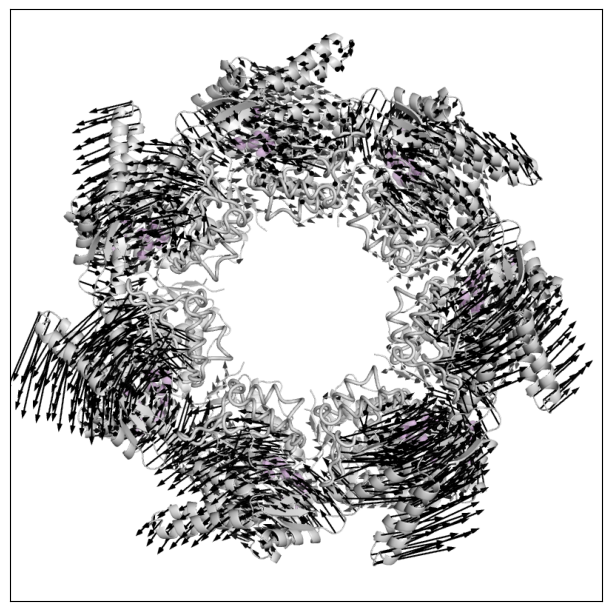

In [48]:
# selection = np.arange(51)

for index, row in df_db.iterrows():
        
    if row['skip'] == 'yes':
        continue

    if index not in selection:
        continue
        
    print(row['protein_id'])

    cmd.reinitialize()
    cmd.run("src/pymol_cmds.py")
    cmd.do("show_disp {}".format(index))
    cmd.ray(800, 800)
    cmd.png("data/figs/test_disp.png")

    
    fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 6))
    
    ax1.imshow(mpimg.imread('data/figs/test_disp.png'))
    
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    
    plt.show()
    

In [84]:
import time

if os.path.exists("data/results.xlsx"):
    df_results =  pd.read_excel('data/results.xlsx')

else:
    df_results = pd.DataFrame(columns=["protein_id", "subunit_structure", "lrmsd_norm", 
                                       "hinge_scale", "overlap", "sector_sizes", 
                                       "multi_hinge_scale", "multi_overlap", "multi_sector_sizes",
                                      "allo_path_scale", "allo_path_norm", 
                                       "coop_path_scale", "coop_path_norm"])

df_results.set_index("protein_id", inplace=True)

df_results['sector_sizes'] = df_results['sector_sizes'].astype('object')
df_results['multi_sector_sizes'] = df_results['multi_sector_sizes'].astype('object')

display(df_results)
    
l0 = 15

for index, row in df_db.iterrows():
    
    if row['skip'] == 'yes':
        continue

    if index not in selection:
        continue
    
    
    N_sectors = df_db.loc[index, 'n_sectors']
    
    
#     if N_sectors == 2:
#         continue
    
    prot_id = row['protein_id']
    
    print("######################################################")
        
    print(index, prot_id)
    
#     df_results.drop(index=prot_id, inplace=True, errors='ignore')
    
    df_results.loc[prot_id, 'subunit_structure'] = row['subunit_structure']
    
    with open("data/" + prot_id + "/structure.pkl", 'rb') as pkl_file:
        data = pickle.load(pkl_file)
        df_prot_merged = data['merged structure']
        df_bonds_ref_merged = data['merged reference bonds']
        
        df_prot_ref = data['reference structure']
        df_bonds_ref = data['reference bonds']
        
    print("Protein Size:", len(df_prot_merged.index), flush=True)
    
    # calculate local deformation
    palgs.calc_local_rmsd(df_prot_merged, l0=l0)
      
            
        
    has_allo_path = False
    has_coop_path = False
    # find allosteric pathways
    if len(df_prot_merged.query("allo_site!=-1 and active_site==-1")) > 0 and len(df_prot_merged.query("allo_site==-1 and active_site!=-1")) > 0:
        has_allo_path = True
    
        allo_strain_path_scales, allo_strain_path_lengths, allo_strain_paths, max_edge_scale = palgs.find_allo_strain_path(df_prot_merged, df_bonds_ref_merged)
        allo_strain_path_scale = allo_strain_path_scales[0]
        allo_strain_path = allo_strain_paths[0]
                
        print("Allo Path Scale:", allo_strain_path_scale)
        
        df_results.loc[prot_id, 'allo_path_scale'] = allo_strain_path_scale
           
        allo_path_norm = df_prot_merged.iloc[allo_strain_path[0]]['lrmsd']
        
        df_results.loc[prot_id, 'allo_path_norm'] = allo_path_norm
        
        print("Allo Path Norm:", allo_path_norm)
            
        df_prot_merged['allo_path'] = -1
        for i, vi in enumerate(allo_strain_path):
            df_prot_merged.iloc[vi, df_prot_merged.columns.get_loc("allo_path")] = i
            
        df_bonds_ref_merged['allo_path_max_scale'] = max_edge_scale
            

    # find cooperative pathways
    if len(df_prot_merged.query("allo_site==-1 and active_site!=-1")['active_site'].unique()) > 1:
        has_coop_path = True
        
        coop_strain_path_scales, coop_strain_path_lengths, coop_strain_paths, max_edge_scale = palgs.find_coop_strain_path(df_prot_merged, df_bonds_ref_merged)
        coop_strain_path_scale = coop_strain_path_scales[0]
        coop_strain_path = coop_strain_paths[0]
        
        print("Coop Path Scale:", coop_strain_path_scale)
    
        df_results.loc[prot_id, 'coop_path_scale'] = coop_strain_path_scale
        
        coop_path_norm = np.max([df_prot_merged.iloc[coop_strain_path[0]]['lrmsd'], df_prot_merged.iloc[coop_strain_path[-1]]['lrmsd']])
        
        df_results.loc[prot_id, 'coop_path_norm'] = coop_path_norm
        
        print("Coop Path Norm:", coop_path_norm)
            
        
        df_prot_merged['coop_path'] = -1
        for i, vi in enumerate(coop_strain_path):
            df_prot_merged.iloc[vi, df_prot_merged.columns.get_loc("coop_path")] = i
            
        df_bonds_ref_merged['coop_path_max_scale'] = max_edge_scale
    
    if len(df_prot_merged.query("allo_site!=-1")) > 0:
        S_max = df_prot_merged.query("allo_site!=-1")['lrmsd'].max()
        print("S_max:", S_max)
        df_results.loc[prot_id, 'S_max'] = S_max

        S_avg = df_prot_merged.query("allo_site!=-1")['lrmsd'].mean()
        print("S_avg:", S_avg)
        df_results.loc[prot_id, 'S_avg'] = S_avg
        
    if len(df_prot_merged.query("active_site!=-1")) > 0:
        T_max = df_prot_merged.query("active_site!=-1")['lrmsd'].max()
        print("T_max:", T_max)
        df_results.loc[prot_id, 'T_max'] = T_max
        
        T_avg = df_prot_merged.query("active_site!=-1")['lrmsd'].mean()
        print("T_avg:", T_avg)
        df_results.loc[prot_id, 'T_avg'] = T_avg
        

    if has_allo_path:
        print("Using allosteric pathway normalization.")
        df_results.loc[prot_id, 'lrmsd_norm'] = df_results.loc[prot_id, 'allo_path_norm']
    elif has_coop_path:
        print("Using cooperative pathway normalization.")
        df_results.loc[prot_id, 'lrmsd_norm'] = df_results.loc[prot_id, 'coop_path_norm'] 
    # only has allosteric sites labeled
    elif len(df_prot_merged.query("allo_site!=-1")) > 0:
        print("Using allosteric site normalization.")
        df_results.loc[prot_id, 'lrmsd_norm'] = df_results.loc[prot_id, 'S_avg']
    # only has active sites labeled
    elif len(df_prot_merged.query("active_site!=-1")) > 0:
        print("Using active site normalization.")
        df_results.loc[prot_id, 'lrmsd_norm'] = df_results.loc[prot_id, 'T_avg']
    else:
        print("Error finding normalization...")
        
    print("Normalization:", df_results.loc[prot_id, 'lrmsd_norm'])
    
    min_size = 200
    
    print("Min Sector Size:", min_size)
     
    start = time.time()
        
    hinge_scale, hinge_overlap, sectors_to_verts = palgs.find_hinge(df_prot_merged, df_bonds_ref_merged, N_sectors=2, min_size=min_size)
    
    print("Hinge Scale:", hinge_scale)
    print("Overlap:", hinge_overlap)
    end = time.time()
        
    sector_sizes = [len(sectors_to_verts[si]) for si in range(len(sectors_to_verts))]
    
        
    df_results.loc[prot_id, 'hinge_scale'] = hinge_scale
    df_results.loc[prot_id, 'overlap'] = hinge_overlap
    df_results.at[prot_id, 'sector_sizes'] = sector_sizes
    
    df_prot_merged['sector'] = -1
    for si in range(len(sectors_to_verts)):
        df_prot_merged.iloc[list(sectors_to_verts[si]), df_prot_merged.columns.get_loc("sector")] = si
    
        
    if N_sectors > 2:
        
        multi_hinge_scale, multi_hinge_overlap, sectors_to_verts = palgs.find_hinge(df_prot_merged, df_bonds_ref_merged, N_sectors=N_sectors, min_size=min_size)

        sector_sizes = [len(sectors_to_verts[si]) for si in range(len(sectors_to_verts))]
        
        print("Multi Hinge Scale:", multi_hinge_scale)
        print("Multi Overlap:", multi_hinge_overlap)

        df_results.loc[prot_id, 'multi_hinge_scale'] = multi_hinge_scale
        df_results.loc[prot_id, 'multi_overlap'] = multi_hinge_overlap
        df_results.at[prot_id, 'multi_sector_sizes'] = sector_sizes
        
        df_prot_merged['multi_sector'] = -1
        for si in range(len(sectors_to_verts)):
            df_prot_merged.iloc[list(sectors_to_verts[si]), df_prot_merged.columns.get_loc("multi_sector")] = si

    print("Elapsed Time:", (end - start)/60, "min")

   
    
    with open("data/" + prot_id + "/structure.pkl", 'wb') as pkl_file:
        data['merged structure'] = df_prot_merged
        data['merged reference bonds'] = df_bonds_ref_merged
        pickle.dump(data, pkl_file)
        
    print("######################################################")
        
    print("Normalized Hinge Scale:", hinge_scale/df_results.loc[prot_id, 'lrmsd_norm'])
    print("Hinge Overlap:", hinge_overlap)
    
    if N_sectors > 2:
        print("Normalized Multidomain Hinge Scale:", multi_hinge_scale/df_results.loc[prot_id, 'lrmsd_norm'])
        print("Multidomain Hinge Overlap:", multi_hinge_overlap)
    
    if has_allo_path:
        print("Normalized Allo Pathway Scale:", allo_strain_path_scale/df_results.loc[prot_id, 'lrmsd_norm'])
    if has_coop_path:
        print("Normalized Coop Pathway Scale:", coop_strain_path_scale/df_results.loc[prot_id, 'lrmsd_norm'])
        
    print("######################################################")
        
    display(df_results.loc[prot_id])
        
    df_results.to_excel("data/results.xlsx") 
            
display(df_results)
    

,subunit_structure,lrmsd_norm,hinge_scale,overlap,sector_sizes,multi_hinge_scale,multi_overlap,multi_sector_sizes,allo_path_scale,allo_path_norm,coop_path_scale,coop_path_norm,S_max,S_avg,T_max,T_avg
protein_id,,,,,,,,,,,,,,,,
ARF6,monomer,5.449361,0.114520,0.352951,"[308, 1013]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.421571,5.449361,NaN,NaN
CDC42,monomer,7.417029,0.168181,0.174635,"[212, 1254]",NaN,NaN,NaN,5.496503,7.417029,NaN,NaN,9.783471,3.662031,8.837249,2.885582
tuf,monomer,4.870424,4.027254,0.932934,"[1632, 1444]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.663003,4.870424,NaN,NaN
RAB11A,monomer,1.885349,0.117590,0.373637,"[470, 840]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.717917,1.885349,NaN,NaN
RAC1,monomer,2.419059,0.081578,0.253335,"[1167, 200]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.692600,2.419059,NaN,NaN
RAP2A,monomer,3.064572,0.343879,0.130885,"[236, 979]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.081576,3.064572,NaN,NaN
HRAS,monomer,2.277317,0.168723,0.155919,"[207, 1133]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.078641,2.277317,NaN,NaN
RHEB,monomer,2.290213,0.074034,0.127771,"[206, 1138]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.271561,2.290213,NaN,NaN
RHOA,monomer,2.830846,0.133620,0.206964,"[375, 1028]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.789191,2.830846,NaN,NaN


######################################################
54 groEL
Protein Size: 23581
S_max: 8.049324927931625
S_avg: 1.9990403215393404
Using allosteric site normalization.
Normalization: 1.9990403215393404
Min Sector Size: 200
[23581]
0 / 1497
Hinge Scale: 0.020563022593258595 Overlap: 0.24790632261830042
Sector Sizes: [16074, 7507]
1 / 1497
Hinge Scale: 0.029786768561706145 Overlap: 0.1336597576485306
Sector Sizes: [11017, 12564]
4 / 1497
Hinge Scale: 0.04938685503062146 Overlap: 0.12972768613380392
Sector Sizes: [7832, 15749]
7 / 1497
Hinge Scale: 0.05803997939527483 Overlap: 0.28175609021032294
Sector Sizes: [4596, 18985]
8 / 1497
Hinge Scale: 0.05833156421591379 Overlap: 0.17944894348355295
Sector Sizes: [6378, 17203]
9 / 1497
Hinge Scale: 0.06110905848117287 Overlap: 0.2672587434795011
Sector Sizes: [12859, 10722]
11 / 1497
Hinge Scale: 0.07089673624810322 Overlap: 0.17861386368226978
Sector Sizes: [6418, 17163]
12 / 1497
Hinge Scale: 0.0731425980110536 Overlap: 0.2454760977733733

subunit_structure                  monoseptamer
lrmsd_norm                              1.99904
hinge_scale                            0.577258
overlap                                0.310564
sector_sizes                      [22023, 1558]
multi_hinge_scale                      0.439666
multi_overlap                          0.603518
multi_sector_sizes    [13684, 6733, 1606, 1558]
allo_path_scale                             NaN
allo_path_norm                              NaN
coop_path_scale                             NaN
coop_path_norm                              NaN
S_max                                  8.049325
S_avg                                   1.99904
T_max                                       NaN
T_avg                                       NaN
Name: groEL, dtype: object

,subunit_structure,lrmsd_norm,hinge_scale,overlap,sector_sizes,multi_hinge_scale,multi_overlap,multi_sector_sizes,allo_path_scale,allo_path_norm,coop_path_scale,coop_path_norm,S_max,S_avg,T_max,T_avg
protein_id,,,,,,,,,,,,,,,,
ARF6,monomer,5.449361,0.114520,0.352951,"[308, 1013]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.421571,5.449361,NaN,NaN
CDC42,monomer,7.417029,0.168181,0.174635,"[212, 1254]",NaN,NaN,NaN,5.496503,7.417029,NaN,NaN,9.783471,3.662031,8.837249,2.885582
tuf,monomer,4.870424,4.027254,0.932934,"[1632, 1444]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.663003,4.870424,NaN,NaN
RAB11A,monomer,1.885349,0.117590,0.373637,"[470, 840]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.717917,1.885349,NaN,NaN
RAC1,monomer,2.419059,0.081578,0.253335,"[1167, 200]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.692600,2.419059,NaN,NaN
RAP2A,monomer,3.064572,0.343879,0.130885,"[236, 979]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.081576,3.064572,NaN,NaN
HRAS,monomer,2.277317,0.168723,0.155919,"[207, 1133]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.078641,2.277317,NaN,NaN
RHEB,monomer,2.290213,0.074034,0.127771,"[206, 1138]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.271561,2.290213,NaN,NaN
RHOA,monomer,2.830846,0.133620,0.206964,"[375, 1028]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.789191,2.830846,NaN,NaN


54 groEL
PyMOL>show_disp 54

Total number of atoms = 3288
Atoms skipped = 0
Atoms counted = 2841 (see PyMOL object "modevectors")
Atoms cutoff  = 447
PyMOL>show_topo 54


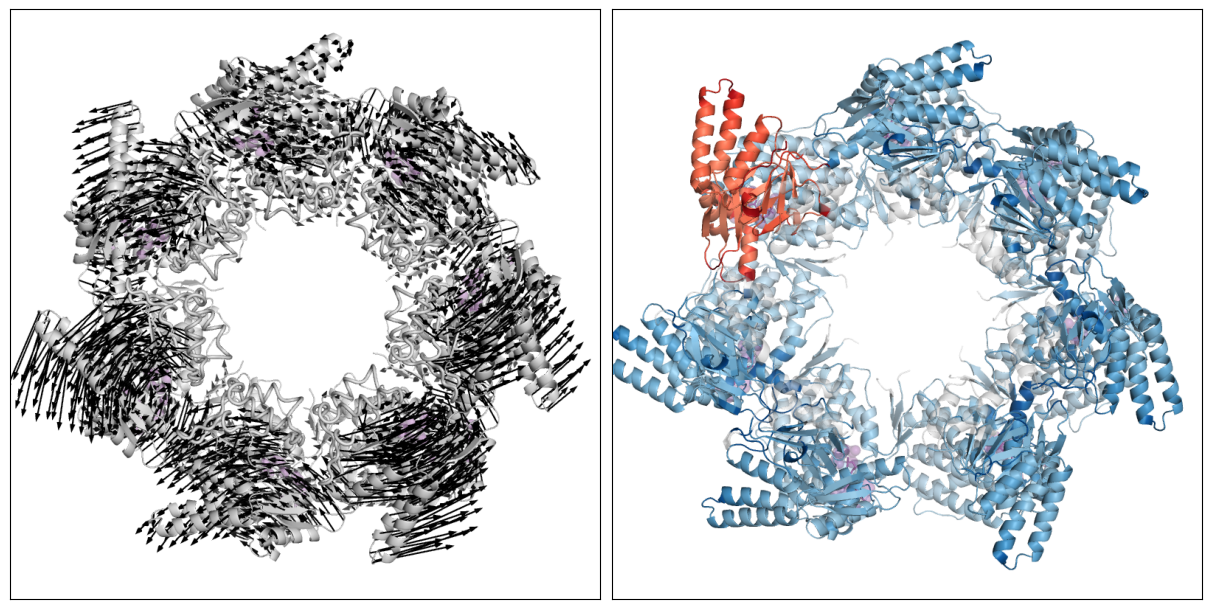

In [85]:
# selection = [53]

for index, row in df_db.iterrows():
        
    if row['skip'] == 'yes':
        continue

    if index not in selection:
        continue
        
    print(index, row['protein_id'])
    
#     print(df_results.loc[row['protein_id']])

    cmd.reinitialize()
    cmd.run("src/pymol_cmds.py")
    cmd.do("show_disp {}".format(index))
    cmd.ray(800, 800)
    cmd.png('data/figs/{}_disp.png'.format(row['protein_id']))

    cmd.reinitialize()
    cmd.run("src/pymol_cmds.py")
    cmd.do("show_topo {}".format(index))
    cmd.ray(800, 800)
    cmd.png('data/figs/{}_topo.png'.format(row['protein_id']))
    
    # cmd.reinitialize()
    # cmd.run("src/pymol_cmds.py")
    # cmd.do("show_paths {}".format(index))
    # cmd.ray(800, 800)
    # cmd.png('data/figs/{}_topo.png'.format(row['protein_id']))
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))
    
    ax1.imshow(mpimg.imread('data/figs/{}_disp.png'.format(row['protein_id'])))
    
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    
    ax2.imshow(mpimg.imread('data/figs/{}_topo.png'.format(row['protein_id'])))
    
    ax2.get_xaxis().set_ticks([])
    ax2.get_yaxis().set_ticks([])
    
    plt.show()
    
    

